<a href="https://colab.research.google.com/github/Rizwanali324/ML_projects/blob/main/Bank_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Bank Churner Prediction
# The Problem
# Background:
A manager at a local bank is disturbed with more and more customers leaving their credit card services. They need a way of predicting which customers are most likely to stop using their credit card products (Customer Churn) in order to proactively check in on the customer to provide them better services in order to convince them to change their minds. You are given a dataset of 10,000 customers with 18 features per customer. Roughly 16% of the current customer base have churned so far, so it will be difficult to predict the ones who will.

As you analyze the data, before you create the model, the sales team also needs you to determine the most influential factors that can lead to a customer's decision of leaving the business. The head of the sales department is expecting a report that helps them visualize where the differences lie between churning and non-churning customers.

Objectives:
Identify which customers are most likely to be churned so the bank manager knows who to provide a better service to
The Top Priority is to identify churning customers,as if we predict non-churning customers as churned, it won't harm our business, but predicting churning customers as Non-churning will. False negatives won't hurt us, but False Positives do
This task is binary classification
A clean and easy to understand visual report that helps the sales team better visualize what makes a client churn or not churn
Performance of the model will be mesured with accuracy and the rate of False Positives. The manager is looking for at least a 90% F1 Score accuracy

Precision and Recall Curves as well as the Confusion Matrix will also be used
Issues:
since only 16% of the customers are churned, a data upsampling method (like SMOTE) is needed to match them with the regular customer size to give our model a better chance of catching small details that would be missed had we not upsampled it

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("/content/drive/MyDrive/datasets/BankChurners.csv")

In [4]:
df.sample(6)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
7853,711792783,Existing Customer,45,F,3,Unknown,Divorced,$40K - $60K,Blue,26,...,2032.0,1195,837.0,0.642,4479,80,0.667,0.588,0.000063,0.999940
3873,719739108,Existing Customer,62,F,0,Graduate,Divorced,$40K - $60K,Blue,50,...,11352.0,2517,8835.0,0.751,4021,56,0.806,0.222,0.000280,0.999720
2353,767687208,Existing Customer,31,M,2,Unknown,Single,$80K - $120K,Blue,24,...,34516.0,1180,33336.0,0.801,2329,69,0.605,0.034,0.000333,0.999670
314,708330858,Attrited Customer,57,M,3,Graduate,Married,$120K +,Blue,38,...,8249.0,1381,6868.0,0.798,678,11,0.833,0.167,0.996830,0.003175
6094,720595083,Existing Customer,40,F,3,Unknown,Married,Less than $40K,Blue,30,...,1620.0,1278,342.0,0.595,4530,69,1.029,0.789,0.000218,0.999780
395,716545383,Existing Customer,42,M,3,Uneducated,Single,$40K - $60K,Blue,36,...,9599.0,1554,8045.0,1.087,1154,38,1.235,0.162,0.000022,0.999980


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [6]:
df.sample(6)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
6416,712591983,Existing Customer,52,F,5,Graduate,Single,$40K - $60K,Blue,41,4,2,3,3035.0,1960,1075.0,0.566,4104,79,0.927,0.646,0.000198,0.99980
5124,719557983,Existing Customer,42,M,4,Uneducated,Married,$60K - $80K,Blue,36,5,3,3,2966.0,2371,595.0,0.969,4416,83,0.844,0.799,0.000326,0.99967
1320,719338383,Existing Customer,34,M,2,High School,Married,$120K +,Blue,21,3,3,3,6259.0,1063,5196.0,0.668,1836,50,0.515,0.170,0.000294,0.99971
7001,713247408,Existing Customer,51,F,3,Uneducated,Unknown,Less than $40K,Blue,36,3,1,2,1750.0,813,937.0,0.760,4333,68,0.700,0.465,0.000059,0.99994
6673,794554683,Attrited Customer,41,F,4,Graduate,Married,Less than $40K,Blue,26,4,2,2,3159.0,0,3159.0,0.916,2925,46,0.353,0.000,0.991690,0.00831
8094,790069233,Existing Customer,45,F,3,High School,Divorced,Less than $40K,Blue,37,2,1,2,2052.0,0,2052.0,0.770,4289,72,0.674,0.000,0.000056,0.99994


In [7]:
df.keys()

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [9]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266,-0.046411,0.046410
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114,0.018189,-0.018189
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135,0.019189,-0.019189
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541,0.013693,-0.013694
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663,-0.149981,0.149981
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503,0.153452,-0.153452
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471,0.205772,-0.205772
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965,-0.023853,0.023853
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022,-0.263033,0.263032
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808,-0.000267,0.000267


In [11]:
df.skew()

<ipython-input-11-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


CLIENTNUM                                                                                                                             0.995601
Customer_Age                                                                                                                         -0.033605
Dependent_count                                                                                                                      -0.020826
Months_on_book                                                                                                                       -0.106565
Total_Relationship_Count                                                                                                             -0.162452
Months_Inactive_12_mon                                                                                                                0.633061
Contacts_Count_12_mon                                                                                                                 0.011006

In [12]:
df.isnull().sum().sum()

0

In [13]:
df.duplicated().sum()

0

In [14]:
df = df.iloc[:, 1:-2]

In [15]:
df.sample(6)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10004,Existing Customer,30,F,1,High School,Single,Less than $40K,Blue,23,3,2,2,3955.0,2352,1603.0,0.779,16423,109,0.758,0.595
4072,Existing Customer,27,F,0,Graduate,Married,Less than $40K,Blue,17,4,2,2,2042.0,1567,475.0,0.744,5146,78,0.733,0.767
5965,Existing Customer,44,M,1,Uneducated,Divorced,$120K +,Blue,39,3,2,3,11362.0,0,11362.0,0.668,3197,61,0.564,0.000
6847,Existing Customer,47,F,3,High School,Single,$40K - $60K,Blue,41,6,5,3,1721.0,1355,366.0,0.926,4474,58,1.320,0.787
5959,Existing Customer,52,F,3,Graduate,Single,Less than $40K,Blue,34,5,2,1,2996.0,2147,849.0,0.503,4724,66,0.737,0.717
8635,Existing Customer,39,M,1,Unknown,Single,$80K - $120K,Silver,28,3,1,3,34516.0,2017,32499.0,0.930,8453,90,0.731,0.058


In [16]:
df.keys()

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

# Feature Description
Customer_Age: Demographic variable - Customer's Age in Years

Gender: Demographic variable - M=Male, F=Female

Dependent_count: Demographic variable - Number of dependents

Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

Marital_Status: Demographic variable - Married, Single, Divorced, Unknown

Income_Category: Demographic variable - Annual Income Category of the account holder (< 40K, 40K - 60K, 60K− 80K, 80K− 120K, > $120K, Unknown) <--To be One Hot-encoded

Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

Months_on_book: Period of relationship with bank

Total_Relationship_Count: Total no. of products held by the customer

Months_Inactive_12_mon: No. of months inactive in the last 12 months

Contacts_Count_12_mon: No. of Contacts in the last 12 months

Credit_Limit: Credit Limit on the Credit Card

Total_Revolving_Bal: Total Revolving Balance on the Credit Card

Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)

Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)

Total_Trans_Amt: Total Transaction Amount (Last 12 months)

Total_Trans_Ct: Total Transaction Count (Last 12 months)

Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)

Avg_Utilization_Ratio: Average Card Utilization Ratio

Target
Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1(Attrited Customer) else 0(Existing Customer)

# Exploring the Data
The report for the sales team begins here

In [18]:
import seaborn as sns
import plotly.express as plx
import matplotlib.pyplot as plt
import seaborn as sns

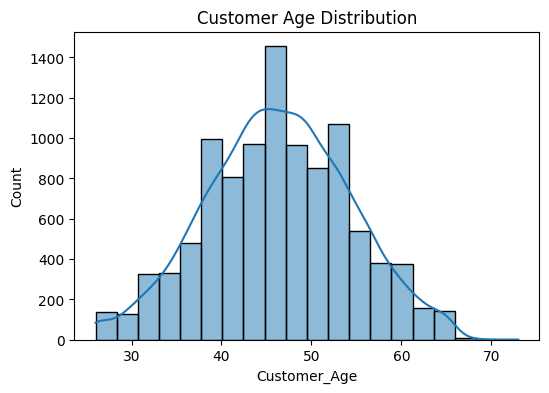

In [19]:
# Example for numerical feature 'Customer_Age'
plt.figure(figsize=(6, 4))
sns.histplot(df['Customer_Age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.show()

In [20]:
cat_features = df.select_dtypes(['object','category']).columns.to_list()

for cat in cat_features:
    fig = plx.pie(df[cat].value_counts(False), values=cat, names = df[cat].value_counts(False).index,title = cat,template='ggplot2')
    fig.show()


Here's an easy-to-understand interpretation of  findings:

1. **Customer Gender**: About half of  customers are male, and the other half are female.

2. **Education**: 30% of  customers are college graduates. The remaining 70% are split between high school graduates, those with unknown education levels, or people who haven't completed high school.

3. **Student Status**: Around 40% of  customers are either currently enrolled in college or are graduate students.

4. **Marital Status**: Almost half of  customers are married, while 38% are single. The remaining 12% are either divorced or have an unknown marital status.

5. **Income**: A significant portion (35%) of  customers earn less than $40,000 per year, which is close to the poverty threshold. The rest have a more evenly distributed range of incomes.

6. **Card Choice**: A vast majority (93%) of  customers opt for the cheapest card option, which likely offers the lowest interest rate. Only a small percentage choose the more expensive cards.

In summary,  customer base seems to be quite diverse in terms of education, marital status, and income. However, a significant portion of them prefer the lowest-cost card option, indicating that they are likely focused on getting the best deal when it comes to credit cards.

In [21]:
fig = plx.box(df, color="Attrition_Flag", y="Total_Relationship_Count",title='Number of products held by customer', points="all")
fig.show()

 Here's an easy-to-understand interpretation:

Customers who have stopped using our services (churned customers) tend to have fewer credit cards compared to those who are still our customers. We can see this because the median number of credit cards for churned customers is lower.

This suggests that there might be an opportunity for us to create a special offer or deal that caters to customers who want or need multiple credit cards. This could be especially appealing to customers who have spouses, families, or businesses and require additional cards for different purposes. Such an offer could help us retain these types of customers or attract new ones who have these specific needs.

In [22]:
fig = plx.box(df, color="Attrition_Flag", y="Months_Inactive_12_mon", points="all",title='Number of months with no transactions in the last year')
fig.show()

 Here's a wise interpretation:

When we look at churned customers, we notice that they tend to have slightly more months of inactivity. However, it's important to note that this trend is most noticeable within the range of 1 to 4 months of inactivity. Keep in mind that this concentration of inactivity in this specific range could be influenced by the size of our sample. In other words, the data may appear more focused in this range due to the number of customers we have in our dataset.

In practical terms, this suggests that churned customers are more likely to disengage from our services within the first few months of inactivity. Understanding this pattern can help us tailor our efforts to re-engage customers during this critical early period to reduce churn and potentially improve customer retention.

In [23]:
fig = plx.histogram(df, x="Credit_Limit", color="Attrition_Flag",title='Credit limit on the credit card')
fig.show()

here's an interpretation:

It appears that churned customers tend to have lower credit limits compared to those who continue using our services. To address this, one strategy could be to consider increasing the credit limits for churned customers, especially for those who have shown responsible credit behavior. By doing so, we may be able to re-engage these customers and encourage them to continue using our services. This approach might help us retain more customers and potentially boost our business in the long run. However, it's essential to assess each case individually and make credit limit adjustments responsibly to minimize risks.

In [24]:
fig = plx.box(df, color="Attrition_Flag", y="Total_Revolving_Bal", points="all",title='Total revolving balance on the credit card')
fig.show()

here's an interpretation:

It's noticeable that churned customers tend to have a significantly smaller revolving balance on their credit cards compared to customers who continue using our services. This smaller revolving balance suggests that churned customers may not be fully paying off their credit card balances.

This behavior could indicate that churned customers might have less disposable income compared to the customers who remain with us. It's possible that these customers are facing financial constraints, which could be a contributing factor to their decision to stop using our services. Understanding this difference in revolving balances can guide us in tailoring financial products or assistance to better meet the needs of customers who are facing financial challenges, potentially helping them to stay engaged with our services in the future.

In [25]:
fig = plx.histogram(df, x="Total_Trans_Ct", color="Attrition_Flag",title='Number of transactions made in the last year')
fig.show()

here's an interpretation and a suggestion:

It's evident that churned customers tend to have a lower number of transactions compared to customers who continue their relationship with our company. This finding aligns with the idea that churned customers are less engaged with our services.

In [26]:
fig = fig = plx.box(df, color="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1", points="all",title='Change in transaction number over the last year (Q4 over Q1)')
fig.show()

here's a summary of all the interpretations provided:

1. **Customer Gender**: Your customer base is evenly split between males and females.

2. **Education**: About 30% of customers are college graduates, while the remaining 70% have varying educational backgrounds, including high school graduates, unknown education levels, or individuals with less education.

3. **Student Status**: Approximately 40% of customers are either current college students or graduate students.

4. **Marital Status**: Nearly half of your customers are married, 38% are single, and the remaining 12% have divorced or unknown marital statuses.

5. **Income**: A significant portion (35%) of customers earn less than $40,000 annually, indicating potential financial challenges. The rest have a more evenly distributed range of incomes.

6. **Card Choice**: The majority (93%) of customers opt for the cheapest card option, likely due to the lowest interest rate, with only a small portion choosing more expensive cards.

7. **Churned Customer Insights**: Churned customers tend to:
   - Have fewer credit cards.
   - Exhibit slightly more inactivity, particularly within the 1-4 months range (possibly influenced by sample size).
   - Have lower credit limits.
   - Carry a smaller revolving balance, suggesting potential financial constraints.
   - Engage in fewer transactions, indicating lower involvement with the company.

**Suggestions**: To address these insights, you may consider:
   - Creating special offers for customers needing multiple credit cards.
   - Increasing credit limits for churned customers, while assessing risks responsibly.
   - Tailoring products or assistance for customers with smaller revolving balances.
   - Implementing strategies to boost customer engagement and retention, such as personalized offers, targeted marketing, and enhanced customer support.

These interpretations provide a comprehensive overview of your customer data and offer actionable insights to improve customer retention and satisfaction.

In [27]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
correlation_matrix

<ipython-input-27-06d400605170>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808
Total_Amt_Chng_Q4_Q1,-0.062042,-0.035439,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235


<ipython-input-28-c8572cf5c6e7>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



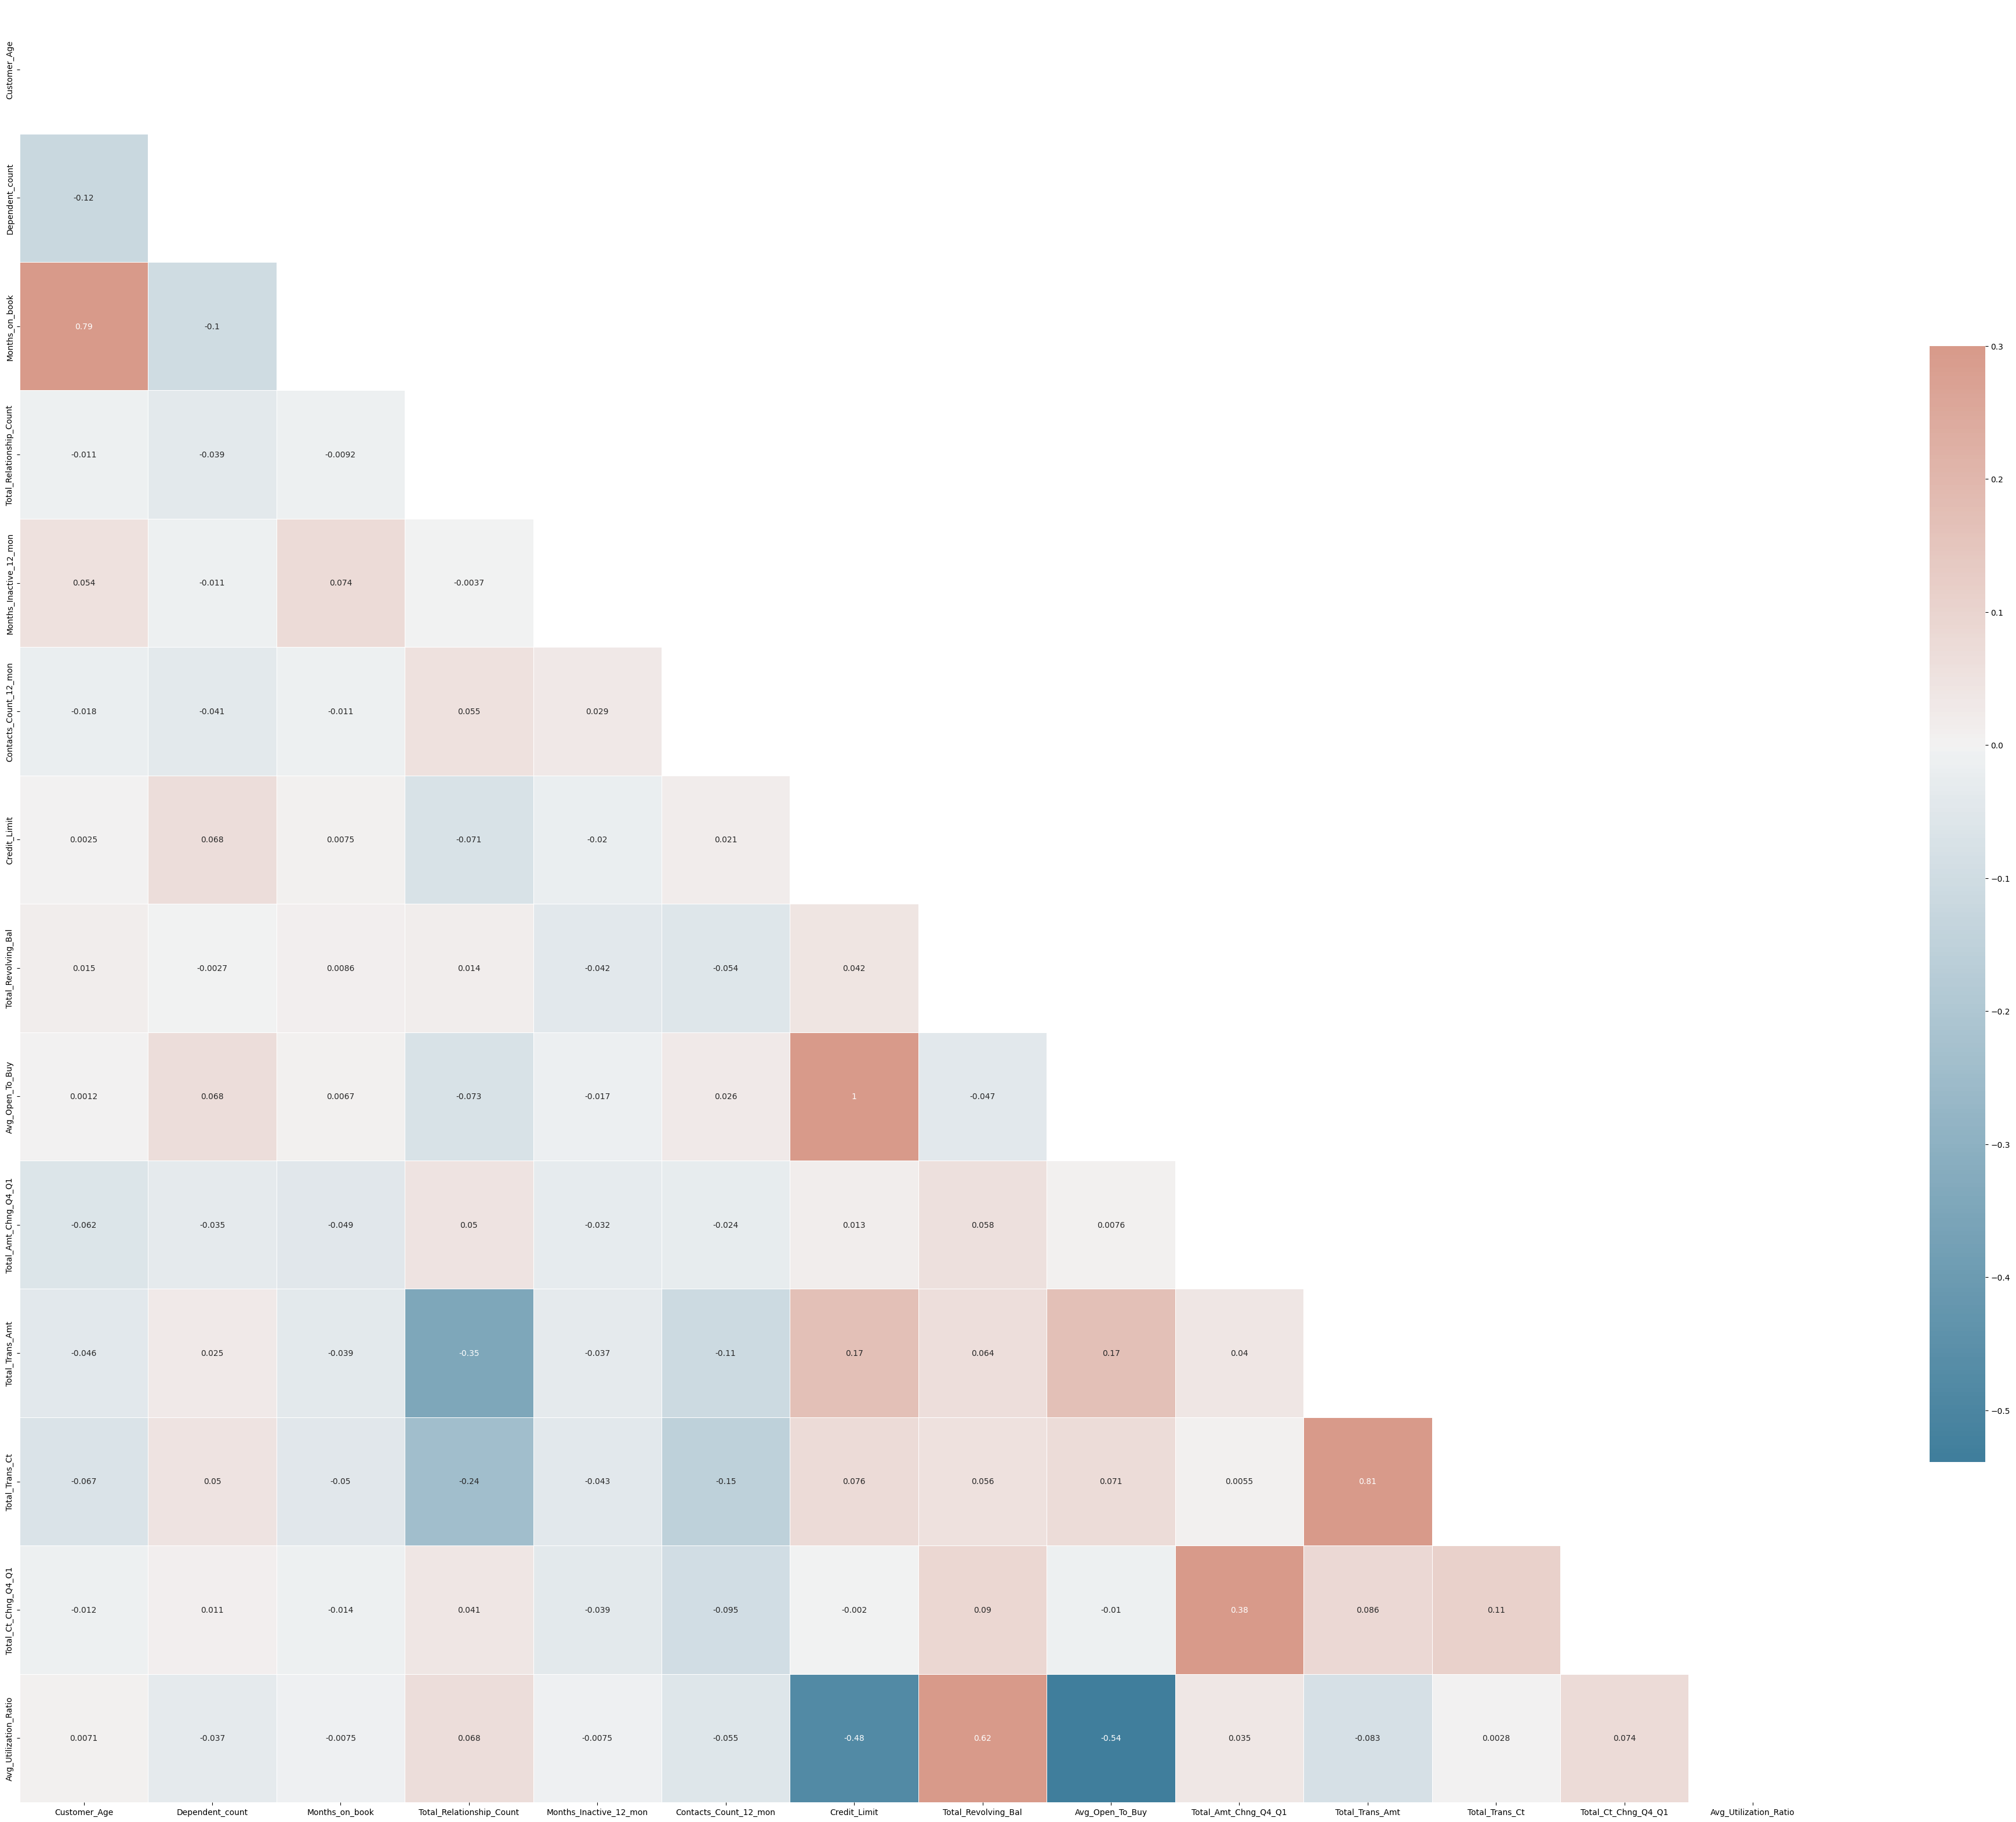

In [28]:
def display_correlation_matrix(df):
    """ Displays a correlation matrix for a dataset """
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(50, 50))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
       square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})

display_correlation_matrix(df)

In terms of percentage, correlations can be summarized as follows:

1. **Positive Correlations**:
   - Age and Time with Company: Strong positive correlation of about 79%.
   - More Relationships, More Interactions: Positive correlation of about 5.5%.
   - Credit Limit and Available Credit: Strong positive correlation of nearly 100%.
   - Transaction Amount and Transaction Count: Strong positive correlation of about 81%.

2. **Negative Correlations**:
   - Older Customers, Fewer Dependents: Negative correlation of about 12%.
   - More Relationships, Fewer Transactions: Negative correlation of about 34.7%.
   - Inactive Months, Fewer Interactions: Negative correlation of about 11.2%.
   - Higher Utilization, Higher Revolving Balances: Positive correlation of about 62.4%.

These percentages represent the strength and direction of the relationships between the mentioned variables in your dataset.

# Data Preprocessing

In [29]:
df1=df.copy()
df1.sample(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10020,Attrited Customer,44,F,4,High School,Unknown,Unknown,Blue,34,4,3,4,15944.0,0,15944.0,0.919,9360,67,0.763,0.000
2386,Existing Customer,58,F,2,Unknown,Married,Less than $40K,Blue,43,6,2,2,3034.0,2517,517.0,0.630,1617,29,1.417,0.830
9274,Existing Customer,37,F,4,Uneducated,Married,Less than $40K,Blue,26,2,1,2,3423.0,647,2776.0,0.730,14308,124,0.722,0.189
1353,Existing Customer,45,M,3,Graduate,Married,$60K - $80K,Blue,25,3,3,2,9791.0,1311,8480.0,0.704,1649,59,0.513,0.134
2852,Existing Customer,44,F,2,Uneducated,Married,Less than $40K,Blue,36,4,2,5,4396.0,1489,2907.0,1.258,3942,69,0.816,0.339


In [30]:
# Loop through columns and find unique values
for column in df1.select_dtypes(include=['object']).columns:
    unique_values = df1[column].unique()
    print(f'Unique values in {column}: {unique_values}')

Unique values in Attrition_Flag: ['Existing Customer' 'Attrited Customer']
Unique values in Gender: ['M' 'F']
Unique values in Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Unique values in Marital_Status: ['Married' 'Single' 'Unknown' 'Divorced']
Unique values in Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Unique values in Card_Category: ['Blue' 'Gold' 'Silver' 'Platinum']


In [31]:
# Define a mapping of values to numbers
value_to_number ={'Attrited Customer':1, 'Existing Customer':0}
# Replace values in the first column
df1['Attrition_Flag'] = df1['Attrition_Flag'].replace(value_to_number)
df1.sample(6)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8099,0,38,F,2,College,Married,Less than $40K,Blue,33,1,3,2,3420.0,1405,2015.0,0.843,4267,75,0.596,0.411
9396,0,55,M,2,Uneducated,Married,$120K +,Blue,48,2,1,2,6577.0,1800,4777.0,0.786,14229,120,0.690,0.274
4992,1,37,F,3,Unknown,Married,Less than $40K,Blue,17,3,1,3,1468.0,1074,394.0,0.697,2050,32,0.524,0.732
1280,0,39,M,1,Unknown,Married,$80K - $120K,Blue,36,6,2,3,2899.0,1999,900.0,0.832,1687,35,0.591,0.690
7850,0,42,F,5,Graduate,Married,$40K - $60K,Blue,36,2,1,1,7434.0,0,7434.0,0.630,4182,76,1.171,0.000
8650,0,43,F,2,College,Married,Less than $40K,Blue,37,3,3,1,5380.0,1337,4043.0,0.845,8947,93,0.576,0.249


# Making  pipeline for preprocesing

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder,LabelBinarizer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', OneHotEncoder(sparse=False,handle_unknown='ignore'),[2,5,7]),
        ("OrdinalEncoder",OrdinalEncoder(),[4,6]),
    ])

# Create a list of base models for the ensemble
base_models = [
    ('logistic', LogisticRegression()),
    ('decision_tree', DecisionTreeClassifier()),
    ('svm', SVC())
]

# Create the VotingClassifier
voting_classifier = VotingClassifier(estimators=base_models, voting='hard')

# Create the final pipeline with preprocessing and the ensemble classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler()),
    ('classifier', voting_classifier)
])


In [34]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [2, 5, 7]),
                                                 ('OrdinalEncoder',
                                                  OrdinalEncoder(), [4, 6])])),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 VotingClassifier(estimators=[('logistic',
                                               LogisticRegression()),
                                              ('decision_tree',
                                               DecisionTreeClassifier()),
                                              ('svm', SVC())]))])

In [35]:
# Split the data into features (X) and target (y)
X = df1.drop('Attrition_Flag', axis=1)  # Exclude the target variable 'gender' for this example
y = df1['Attrition_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline (including preprocessing and the ensemble classifier) on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the accuracy of the ensemble classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Accuracy: 0.84
